In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/workspaces/codespaces-jupyter/data/processed/harga_sayuran_clean.csv'
data = pd.read_csv(file_path)

# Convert 'Tanggal Harga' to datetime, handle inconsistent date formats
data['Tanggal Harga'] = pd.to_datetime(data['Tanggal Harga'], dayfirst=True, errors='coerce')

# Drop rows with invalid dates
data = data.dropna(subset=['Tanggal Harga'])

# Extract features from the date
data['Year'] = data['Tanggal Harga'].dt.year
data['Month'] = data['Tanggal Harga'].dt.month

data.head()


/tmp/ipykernel_6565/2714439059.py:10: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Tanggal Harga'] = pd.to_datetime(data['Tanggal Harga'], dayfirst=True, errors='coerce')


,ID,Jenis Sayuran,Tanggal Harga,Season,Harga Beli Pengepul per Kilogram,Harga Beli Pasar per Kilogram,Year,Month
0,1,Sawi Putih,2021-01-01,Hujan,3452.271603,3752.737482,2021,1
1,2,Cabe Chilli,2021-01-01,Hujan,20762.943610,24271.626950,2021,1
2,3,Cabe Kriting,2021-01-01,Hujan,34203.878890,38963.481980,2021,1
3,4,Cabe Rawit,2021-01-01,Hujan,52807.009800,56674.717880,2021,1
4,5,Kol,2021-01-01,Hujan,1769.608362,2044.366134,2021,1


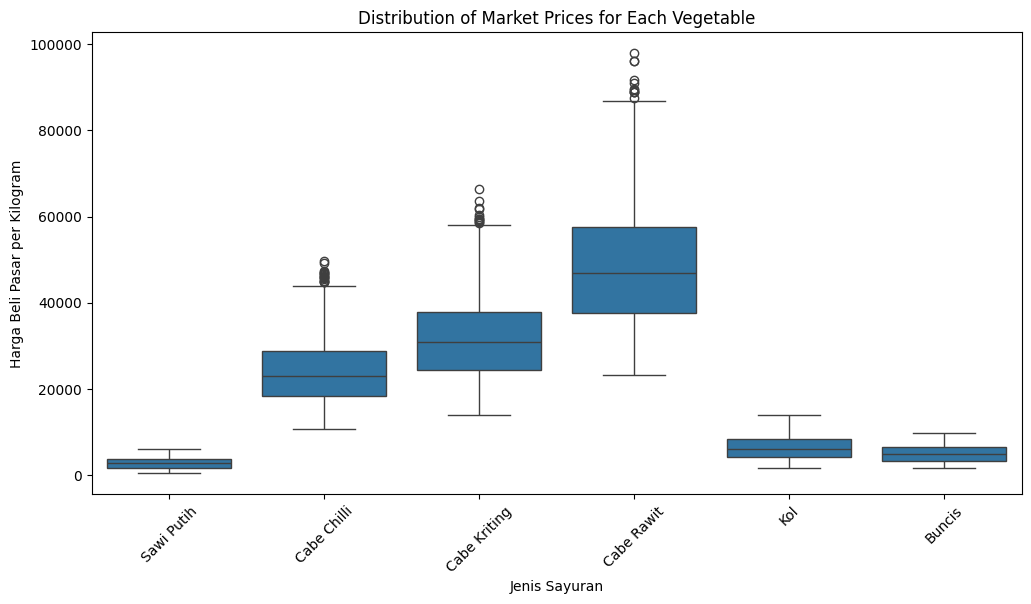

In [2]:
# Plot the distribution of market prices for each vegetable
plt.figure(figsize=(12, 6))
sns.boxplot(x='Jenis Sayuran', y='Harga Beli Pasar per Kilogram', data=data)
plt.title('Distribution of Market Prices for Each Vegetable')
plt.xticks(rotation=45)
plt.show()


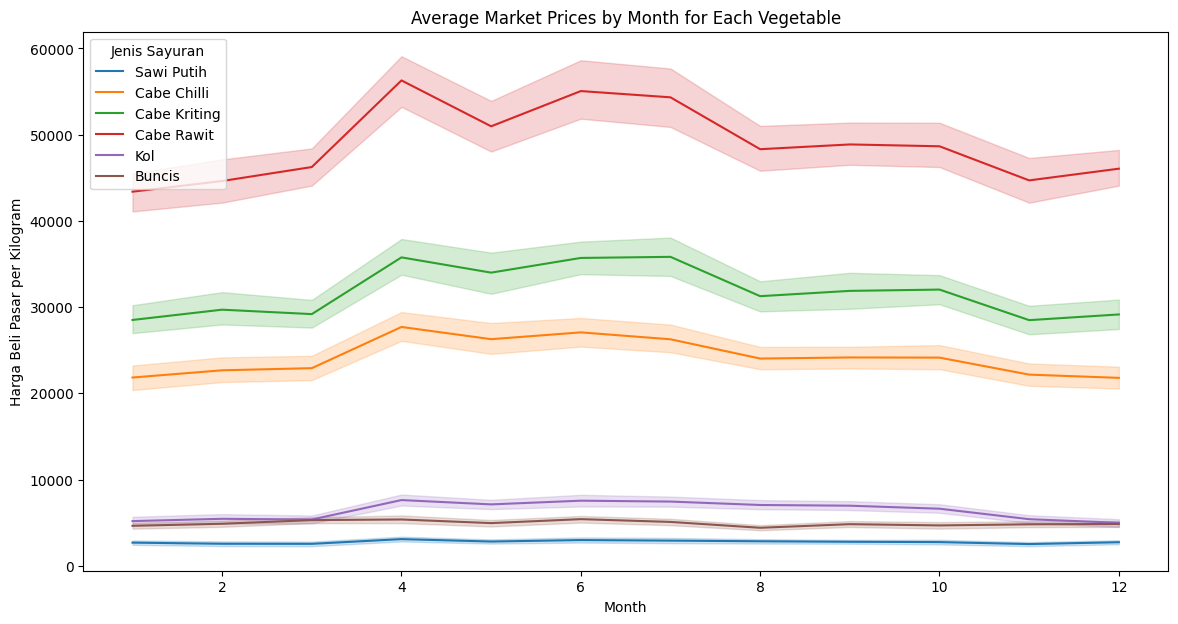

In [3]:
# Plot the average market prices by month for each vegetable
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Harga Beli Pasar per Kilogram', hue='Jenis Sayuran', data=data)
plt.title('Average Market Prices by Month for Each Vegetable')
plt.show()


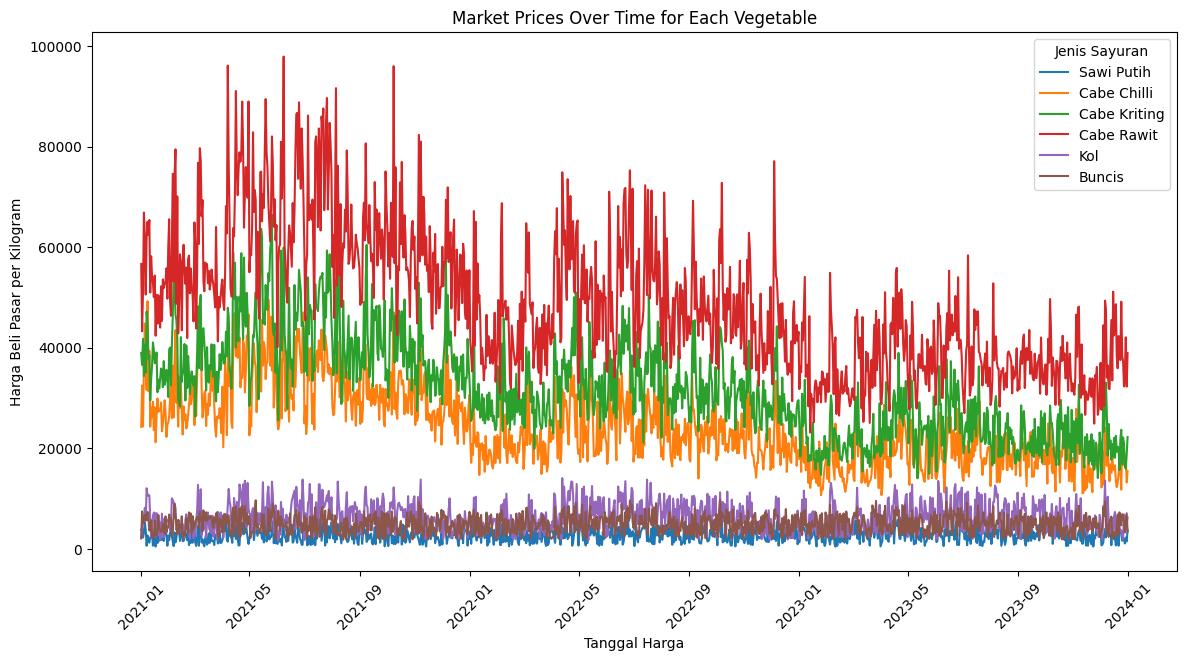

In [4]:
# Plot the market prices over time for each vegetable
plt.figure(figsize=(14, 7))
sns.lineplot(x='Tanggal Harga', y='Harga Beli Pasar per Kilogram', hue='Jenis Sayuran', data=data)
plt.title('Market Prices Over Time for Each Vegetable')
plt.xticks(rotation=45)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['Year', 'Month', 'Jenis Sayuran', 'Season']
target = 'Harga Beli Pasar per Kilogram'

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data[features])

# Combine with target variable
data_encoded[target] = data[target]

# Split the data into training and testing sets
train_data, test_data = train_test_split(data_encoded, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 47232488.78359342
R-squared: 0.8587258828904004


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 47232488.78359342
R-squared: 0.8587258828904004


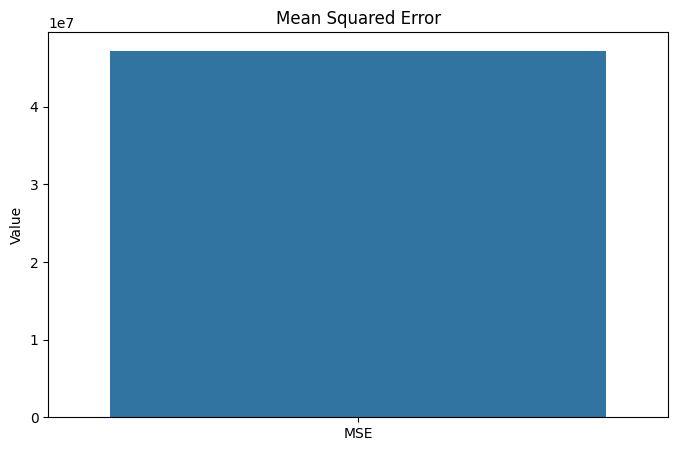

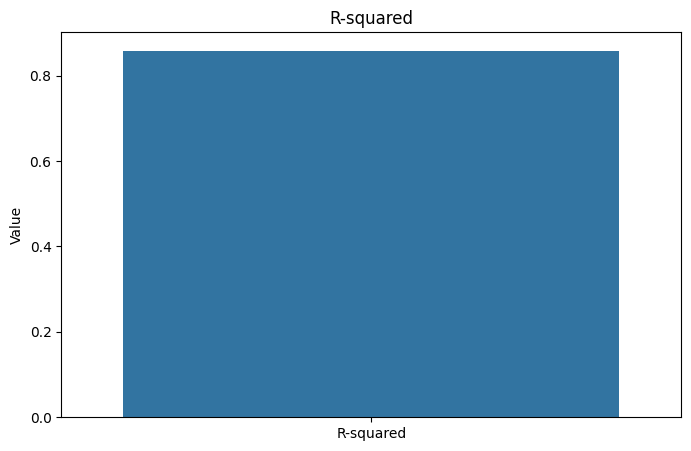

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize MSE
plt.figure(figsize=(8, 5))
sns.barplot(x=['MSE'], y=[mse])
plt.title('Mean Squared Error')
plt.ylabel('Value')
plt.show()

# Visualize R-squared
plt.figure(figsize=(8, 5))
sns.barplot(x=['R-squared'], y=[r2])
plt.title('R-squared')
plt.ylabel('Value')
plt.show()


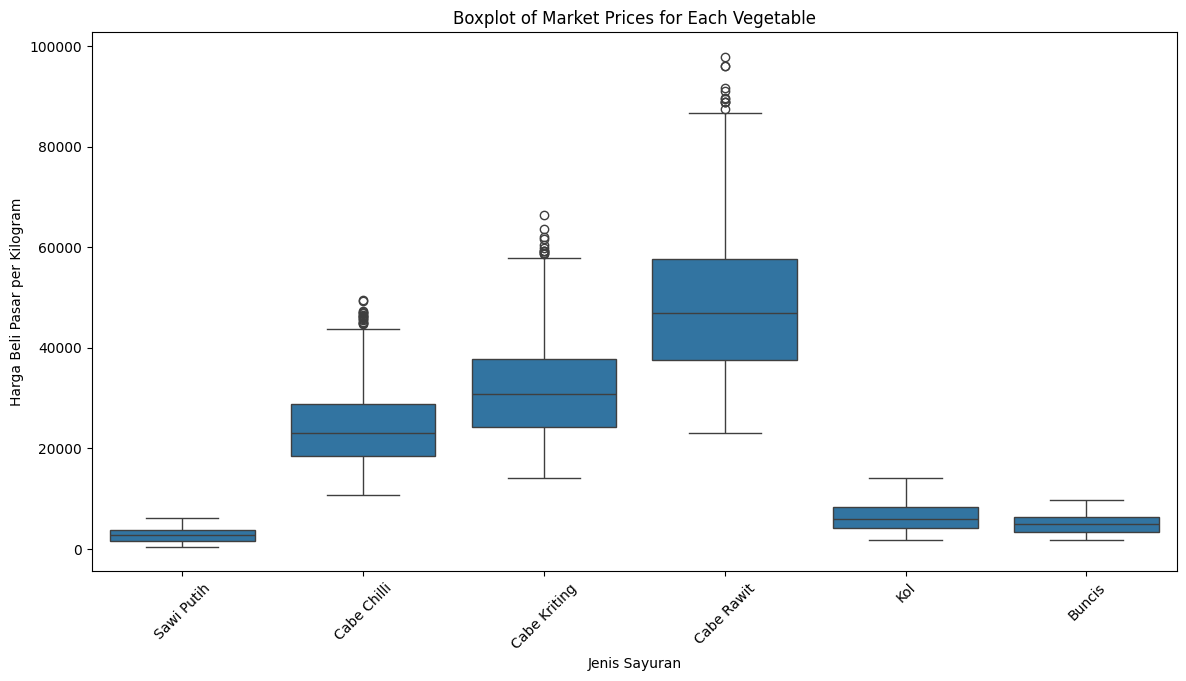

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots to visualize potential outliers
plt.figure(figsize=(14, 7))
sns.boxplot(x='Jenis Sayuran', y='Harga Beli Pasar per Kilogram', data=data)
plt.title('Boxplot of Market Prices for Each Vegetable')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Create interaction terms
data['Year_Month'] = data['Year'] * data['Month']

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data[['Year', 'Month', 'Year_Month', 'Jenis Sayuran', 'Season']])

# Combine with target variable
data_encoded[target] = data[target]

# Split the data into training and testing sets
train_data, test_data = train_test_split(data_encoded, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.3]
}

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Get the best model
best_svr = grid_search.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=1, epsilon=0.1, gamma=0.001; total time=   1.5s
[CV] END ......................C=1, epsilon=0.1, gamma=0.001; total time=   1.5s
[CV] END ......................C=1, epsilon=0.1, gamma=0.001; total time=   1.5s
[CV] END ......................C=1, epsilon=0.1, gamma=0.001; total time=   1.5s
[CV] END ......................C=1, epsilon=0.1, gamma=0.001; total time=   1.5s
[CV] END .......................C=1, epsilon=0.1, gamma=0.01; total time=   1.5s
[CV] END .......................C=1, epsilon=0.1, gamma=0.01; total time=   1.6s
[CV] END .......................C=1, epsilon=0.1, gamma=0.01; total time=   1.6s
[CV] END .......................C=1, epsilon=0.1, gamma=0.01; total time=   1.5s
[CV] END .......................C=1, epsilon=0.1, gamma=0.01; total time=   1.5s
[CV] END ........................C=1, epsilon=0.1, gamma=0.1; total time=   1.5s
[CV] END ........................C=1, epsilon=0

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")


Random Forest - Mean Squared Error: 17428956.813832704
Random Forest - R-squared: 0.9478693469383549


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gb.predict(X_test_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")


Gradient Boosting - Mean Squared Error: 16900612.790084146
Gradient Boosting - R-squared: 0.9494496434124026


In [23]:
# Create a DataFrame to compare the results
results_df = pd.DataFrame({
    'Model': ['SVR', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse, mse_rf, mse_gb],
    'R-squared': [r2, r2_rf, r2_gb]
})

print(results_df)


               Model           MSE  R-squared
0                SVR  4.723249e+07   0.858726
1      Random Forest  1.742896e+07   0.947869
2  Gradient Boosting  1.690061e+07   0.949450


In [24]:
# Make predictions on the test set using the Gradient Boosting model
y_pred_gb = gb.predict(X_test_scaled)

# Combine actual and predicted data
results_gb = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_gb,
    'Year': test_data['Year'],
    'Month': test_data['Month'],
    'Jenis Sayuran': test_data.filter(like='Jenis Sayuran_').idxmax(axis=1).str.replace('Jenis Sayuran_', '')
})

results_gb['Tanggal Harga'] = pd.to_datetime(results_gb['Year'].astype(str) + '-' + results_gb['Month'].astype(str) + '-01')

results_gb.head()


,Actual,Predicted,Year,Month,Jenis Sayuran,Tanggal Harga
5364,3985.495823,3637.095620,2023,6,Sawi Putih,2023-06-01
5586,4161.217475,2857.084127,2023,7,Sawi Putih,2023-07-01
2623,21622.436900,20890.289314,2022,3,Cabe Chilli,2022-03-01
5939,4279.377988,4512.823300,2023,9,Buncis,2023-09-01
1360,4283.424149,7486.936265,2021,8,Kol,2021-08-01


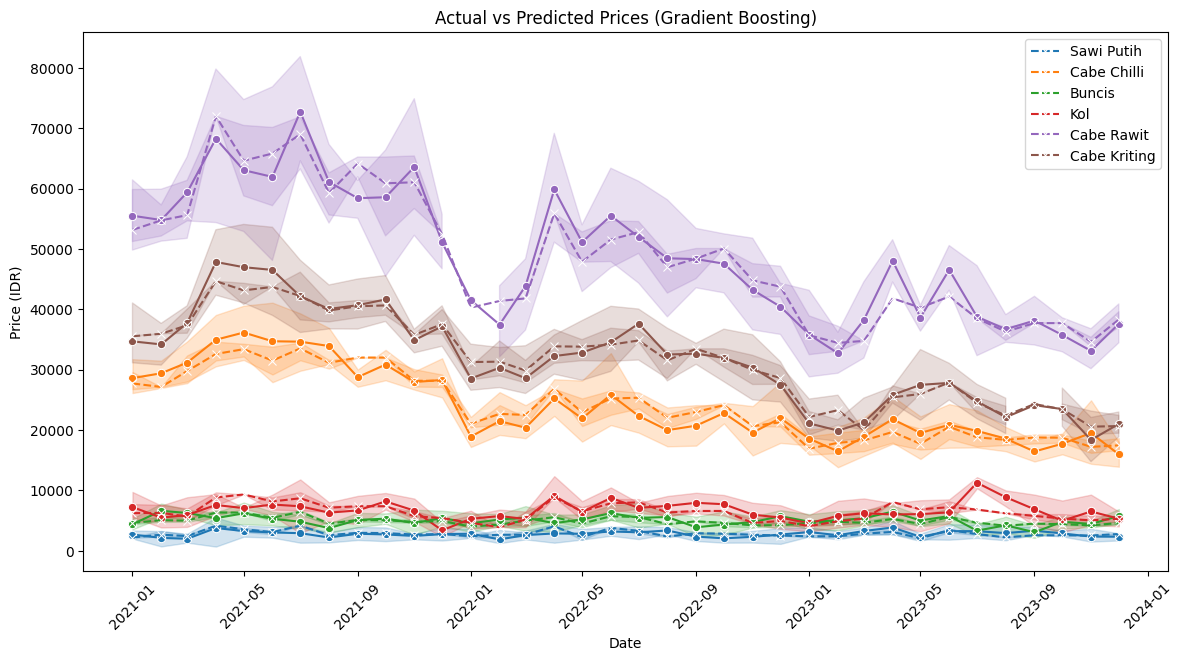

In [25]:
# Plot actual vs predicted prices for Gradient Boosting
plt.figure(figsize=(14, 7))

# Plot actual prices
sns.lineplot(data=results_gb, x='Tanggal Harga', y='Actual', hue='Jenis Sayuran', marker='o', legend=False)

# Plot predicted prices
sns.lineplot(data=results_gb, x='Tanggal Harga', y='Predicted', hue='Jenis Sayuran', marker='x', linestyle='--')

# Adjust the title and labels
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.ylabel('Price (IDR)')
plt.xlabel('Date')
plt.xticks(rotation=45)

# Show the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:len(results_gb['Jenis Sayuran'].unique())], labels[0:len(results_gb['Jenis Sayuran'].unique())])

plt.show()


In [26]:
# Contoh perhitungan manual MSE untuk beberapa data
n = 10  # Jumlah data yang akan digunakan
mse_manual = sum((y_test.values[:n] - y_pred_svr[:n]) ** 2) / n
print(f"Manual MSE (contoh): {mse_manual}")


NameError: name 'y_pred_svr' is not defined

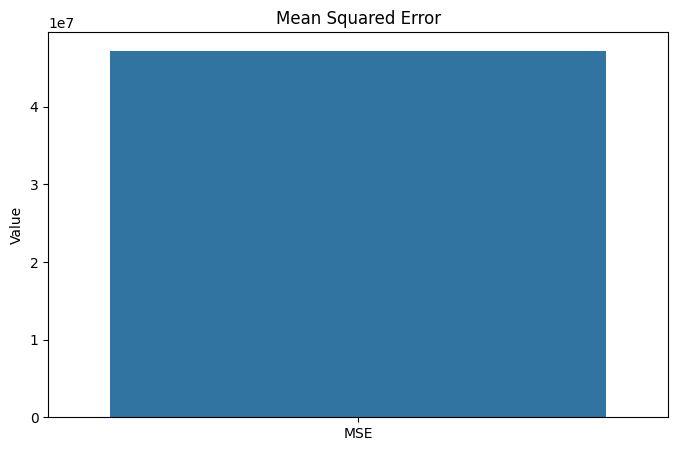

In [9]:
# Visualize MSE
plt.figure(figsize=(8, 5))
sns.barplot(x=['MSE'], y=[mse])
plt.title('Mean Squared Error')
plt.ylabel('Value')
plt.show()


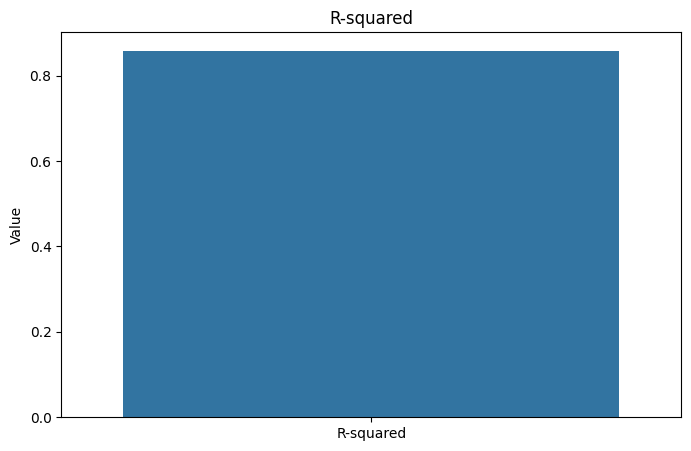

In [10]:
# Visualize R-squared
plt.figure(figsize=(8, 5))
sns.barplot(x=['R-squared'], y=[r2])
plt.title('R-squared')
plt.ylabel('Value')
plt.show()


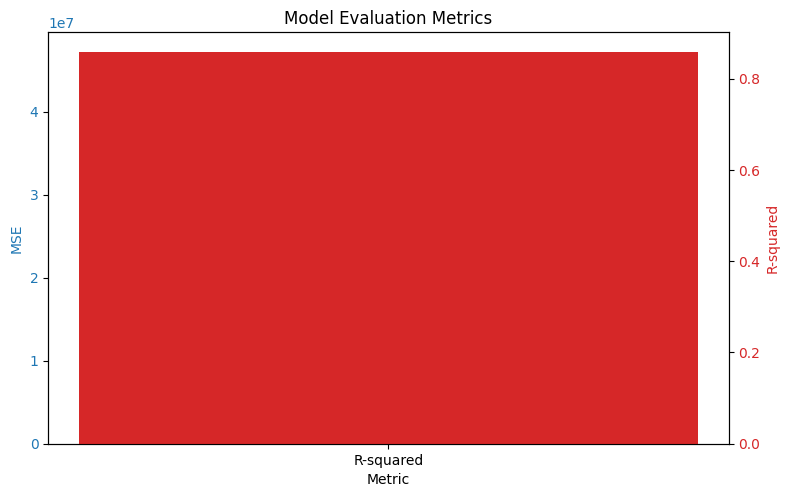

In [11]:
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Metric')
ax1.set_ylabel('MSE', color=color)
ax1.bar(['MSE'], [mse], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('R-squared', color=color)  # we already handled the x-label with ax1
ax2.bar(['R-squared'], [r2], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model Evaluation Metrics')
plt.show()


TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

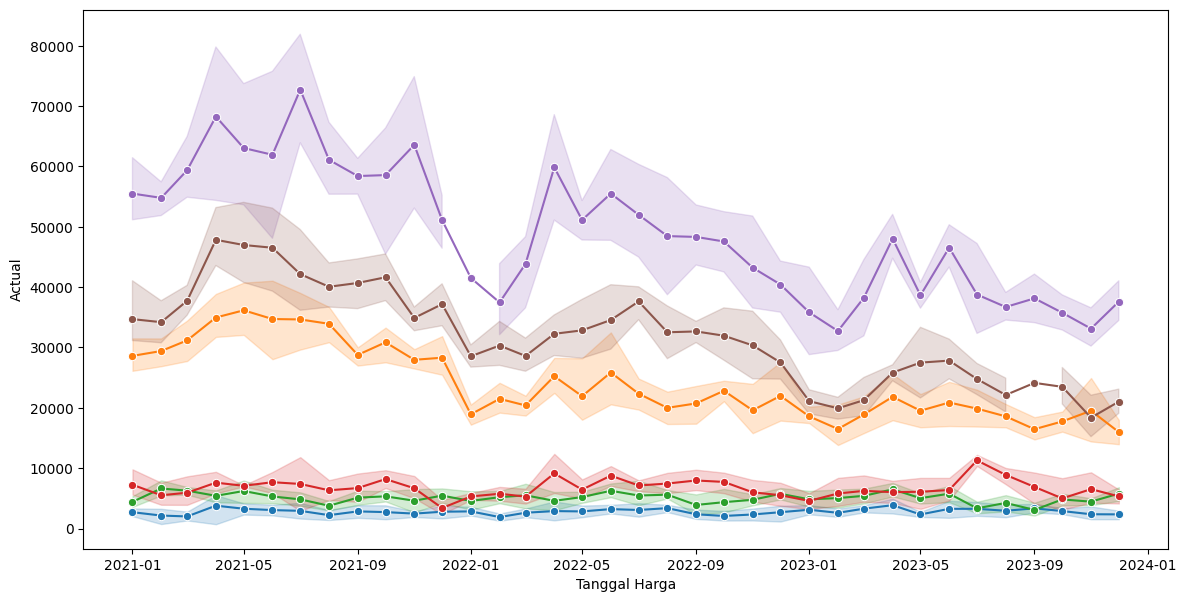

In [12]:
# Combine actual and predicted data
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Year': test_data['Year'],
    'Month': test_data['Month'],
    'Jenis Sayuran': test_data.filter(like='Jenis Sayuran_').idxmax(axis=1).str.replace('Jenis Sayuran_', '')
})

results['Tanggal Harga'] = pd.to_datetime(results['Year'].astype(str) + '-' + results['Month'].astype(str) + '-01')

# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=results, x='Tanggal Harga', y='Actual', hue='Jenis Sayuran', marker='o', label='Actual')
sns.lineplot(data=results, x='Tanggal Harga', y='Predicted', hue='Jenis Sayuran', marker='x', linestyle='--', label='Predicted')
plt.title('Actual vs Predicted Prices')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Combine actual and predicted data
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Year': test_data['Year'],
    'Month': test_data['Month'],
    'Jenis Sayuran': test_data.filter(like='Jenis Sayuran_').idxmax(axis=1).str.replace('Jenis Sayuran_', '')
})

results['Tanggal Harga'] = pd.to_datetime(results['Year'].astype(str) + '-' + results['Month'].astype(str) + '-01')

results.head()


,Actual,Predicted,Year,Month,Jenis Sayuran,Tanggal Harga
5364,3985.495823,3343.915513,2023,6,Sawi Putih,2023-06-01
5586,4161.217475,3249.238965,2023,7,Sawi Putih,2023-07-01
2623,21622.436900,20631.084915,2022,3,Cabe Chilli,2022-03-01
5939,4279.377988,5816.122905,2023,9,Buncis,2023-09-01
1360,4283.424149,8929.913893,2021,8,Kol,2021-08-01


TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

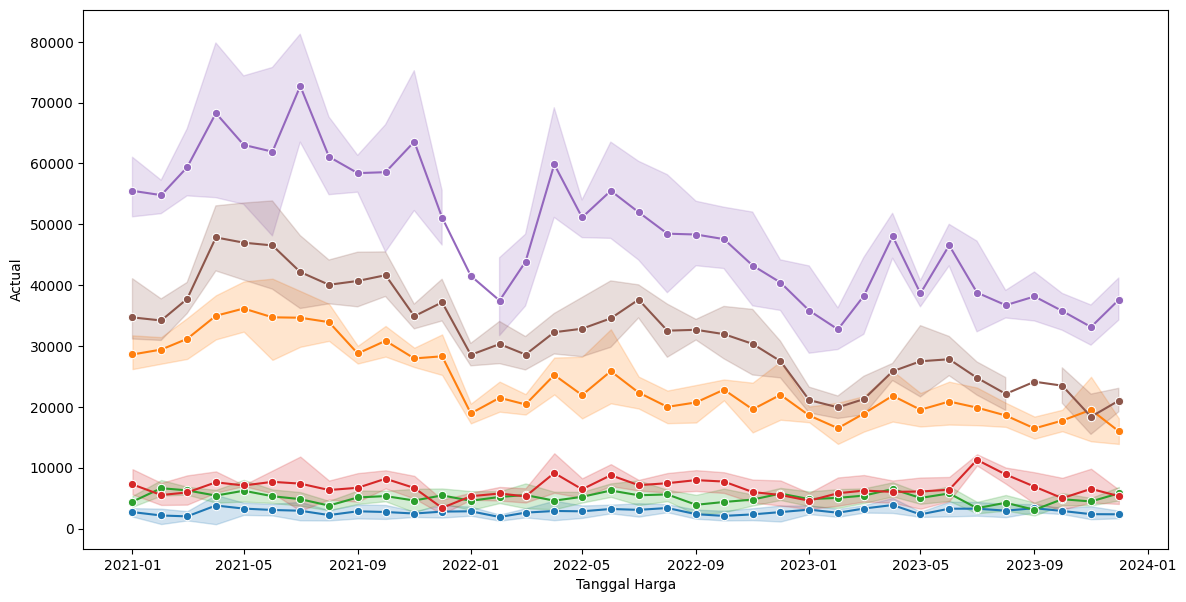

In [14]:
# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=results, x='Tanggal Harga', y='Actual', hue='Jenis Sayuran', marker='o', label='Actual')
sns.lineplot(data=results, x='Tanggal Harga', y='Predicted', hue='Jenis Sayuran', marker='x', linestyle='--', label='Predicted')
plt.title('Actual vs Predicted Prices')
plt.xticks(rotation=45)
plt.ylabel('Price (IDR)')
plt.show()


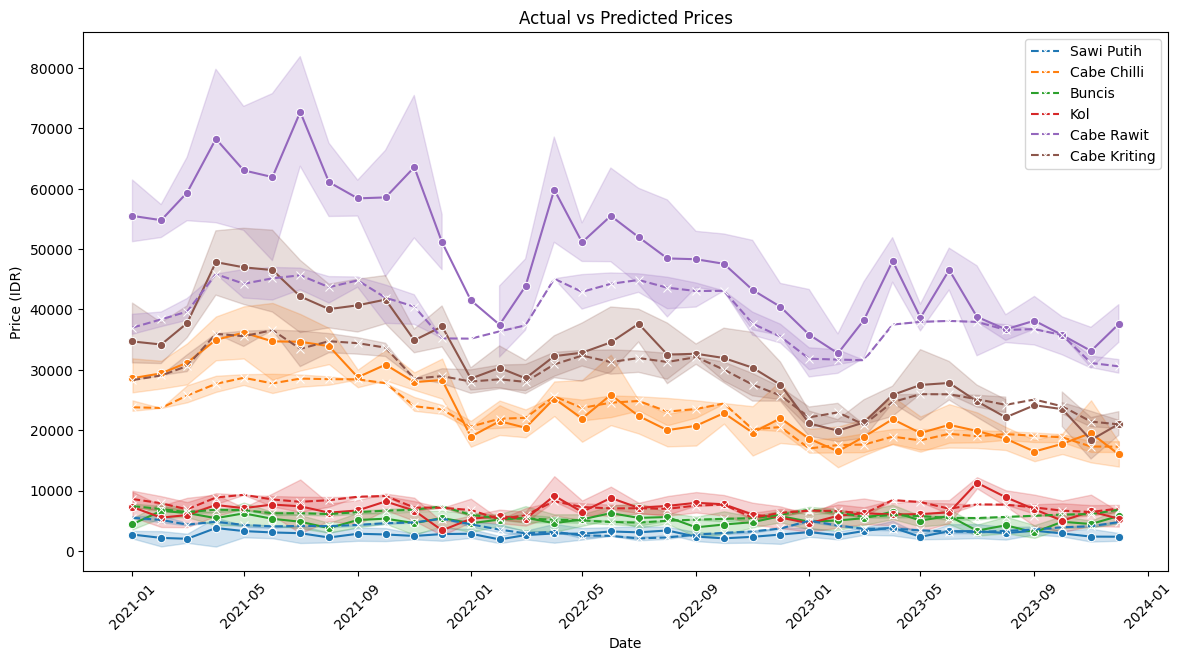

In [15]:
# Combine actual and predicted data
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Year': test_data['Year'],
    'Month': test_data['Month'],
    'Jenis Sayuran': test_data.filter(like='Jenis Sayuran_').idxmax(axis=1).str.replace('Jenis Sayuran_', '')
})

results['Tanggal Harga'] = pd.to_datetime(results['Year'].astype(str) + '-' + results['Month'].astype(str) + '-01')

# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))

# Plot actual prices
sns.lineplot(data=results, x='Tanggal Harga', y='Actual', hue='Jenis Sayuran', marker='o', legend=False)

# Plot predicted prices
sns.lineplot(data=results, x='Tanggal Harga', y='Predicted', hue='Jenis Sayuran', marker='x', linestyle='--')

# Adjust the title and labels
plt.title('Actual vs Predicted Prices')
plt.ylabel('Price (IDR)')
plt.xlabel('Date')
plt.xticks(rotation=45)

# Show the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:len(results['Jenis Sayuran'].unique())], labels[0:len(results['Jenis Sayuran'].unique())])

plt.show()
